In [12]:
from collections import defaultdict

In [13]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
 # set directory - /bioinformatics/Analysis/Algorithms_for_genomic_seq

--2024-06-30 12:19:47--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.245.133.173, 18.245.133.72, 18.245.133.132, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.245.133.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.02s   

2024-06-30 12:19:47 (2.06 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [14]:
def read_genome(filename):
    genome =""
    with open(filename, 'r') as file:
        for line in file:
            if not line.startswith('>'):
                genome += line.rstrip()
    return genome

genome = read_genome('lambda_virus.fa')

In [15]:
# len should be 48502
len(genome)

48502

In [16]:
counts = defaultdict(int)

In [17]:
# manual count of nucleotides 
for base in genome:
    if base in counts:
        counts[base] += 1
    else:
        counts[base] =1 

In [11]:
counts

defaultdict(int, {'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [18]:
#count using the python collection module 
from collections import Counter
count_col = Counter(genome)
count_col

Counter({'G': 12820, 'A': 12334, 'T': 11986, 'C': 11362})

## Sequence read of fastaq file 

### analysis of quality score frequencies 

In [52]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2024-06-30 14:06:50--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.245.133.68, 18.245.133.132, 18.245.133.173, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.245.133.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.1’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.05s   

2024-06-30 14:06:50 (3.97 MB/s) - ‘SRR835775_1.first1000.fastq.1’ saved [224786/224786]



In [53]:
def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename) as file:
        while True:
            file.readline()
            seq = file.readline().rstrip()
            file.readline()
            qual = file.readline().rstrip()
            if len(seq) == 0:
                break

            else:
                sequences.append(seq)
                qualities.append(qual)
    return sequences, qualities

In [55]:
seq, qual = read_fastq('SRR835775_1.first1000.fastq')

In [56]:
# converting the quality score to the value 

def phred33_to_Q(qual):
    """Takes the acsci character of the quality
      from fastsq file and return the value by converting it """
    return ord(qual) - 33

phred33_to_Q('#')
# the '#' is low score 

2

In [57]:
def score_frequencies(qualitlst: list):
    valuelst = [phred33_to_Q(ph) for qual in qualitlst for ph in qual]
    frequencies = Counter(valuelst)
    return frequencies 

frequencies = score_frequencies(qual)
dict(frequencies)

{30: 3387,
 33: 5476,
 16: 184,
 32: 3248,
 35: 11814,
 23: 798,
 10: 193,
 34: 8375,
 25: 888,
 18: 514,
 36: 4243,
 31: 4487,
 8: 345,
 17: 327,
 26: 1396,
 28: 993,
 7: 574,
 13: 165,
 21: 254,
 2: 6178,
 37: 7827,
 38: 6579,
 39: 8179,
 41: 8180,
 40: 9349,
 29: 1752,
 20: 531,
 24: 992,
 27: 1488,
 15: 236,
 11: 124,
 22: 313,
 12: 79,
 6: 108,
 19: 238,
 9: 83,
 5: 54,
 14: 49}

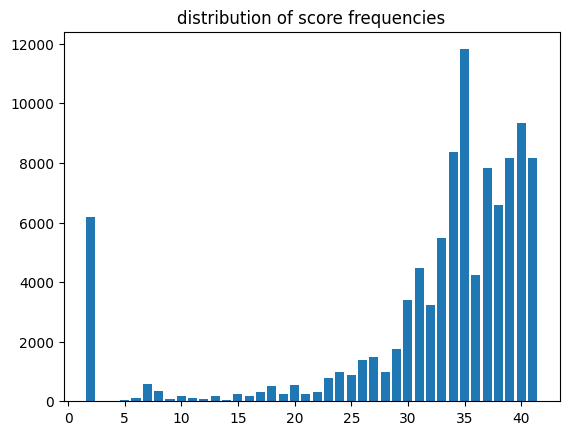

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(list(dict(frequencies).keys()), list(dict(frequencies).values()))
plt.title("distribution of score frequencies")
plt.show()

### GC content of reads 

In [69]:
# all reads are 100 base long 
def findGCinEachRead(reads):
    """finds the CG content and index where the CG bases is found """
    percentLst = []
    for seq in reads: 
        all_bases = dict(Counter(seq))
        percent = None
        if 'G' in all_bases and "C" in all_bases:
            percent =(all_bases['G'] + all_bases['C']) / sum(list(all_bases.values()))
        elif "G" in all_bases:
            percent = all_bases['G'] / sum(list(all_bases.values()))
        elif "C" in all_bases:
            percent = all_bases['C'] / sum(list(all_bases.values()))
        percentLst.append(percent)
    return percentLst

                         
GC_content = findGCinEachRead(seq)
print(GC_content)


[0.51, 0.5, 0.5, 0.52, 0.52, 0.57, 0.56, 0.51, 0.53, 0.59, 0.51, 0.63, 0.52, 0.52, 0.49, 0.5, 0.48, 0.53, 0.43, 0.52, 0.5, 0.53, 0.5, 0.51, 0.5, 0.52, 0.51, 0.53, 0.52, 0.5, 0.66, 0.5, 0.55, 0.56, 0.5, 0.49, 0.55, 0.49, 0.51, 0.51, 0.51, 0.52, 0.54, 0.5, 0.5, 0.55, 0.52, 0.56, 0.47, 0.6, 0.55, 0.55, 0.46, 0.47, 0.52, 0.49, 0.55, 0.51, 0.48, 0.52, 0.5, 0.48, 0.52, 0.49, 0.5, 0.52, 0.49, 0.5, 0.5, 0.53, 0.5, 0.49, 0.51, 0.55, 0.47, 0.49, 0.51, 0.54, 0.51, 0.51, 0.49, 0.5, 0.57, 0.51, 0.52, 0.5, 0.58, 0.56, 0.48, 0.55, 0.52, 0.47, 0.65, 0.51, 0.53, 0.52, 0.49, 0.58, 0.58, 0.6, 0.51, 0.51, 0.55, 0.5, 0.59, 0.51, 0.6, 0.55, 0.5, 0.63, 0.51, 0.61, 0.53, 0.48, 0.5, 0.51, 0.49, 0.54, 0.52, 0.51, 0.52, 0.57, 0.54, 0.52, 0.51, 0.53, 0.51, 0.5, 0.52, 0.5, 0.52, 0.56, 0.55, 0.59, 0.55, 0.56, 0.54, 0.49, 0.55, 0.51, 0.53, 0.54, 0.52, 0.49, 0.6, 0.51, 0.53, 0.54, 0.53, 0.52, 0.6, 0.63, 0.52, 0.47, 0.52, 0.51, 0.5, 0.49, 0.54, 0.5, 0.5, 0.51, 0.56, 0.55, 0.5, 0.51, 0.56, 0.5, 0.53, 0.48, 0.53, 0.49, 

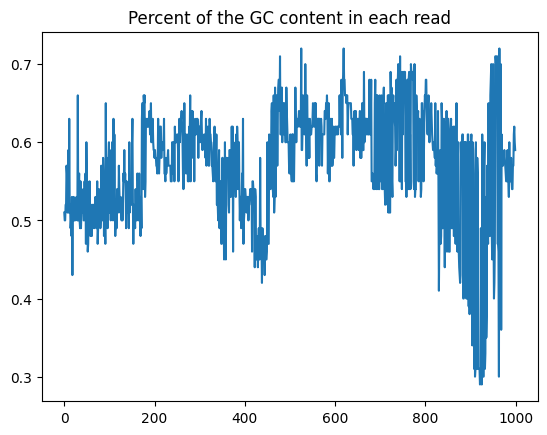

In [71]:
plt.plot(range(len(GC_content)), GC_content)
plt.title("Percent of the GC content in each read")
plt.show()
# summary: we have 1000 reads and in the late reads the content of CG is changing 
# drastically 0.3 to 0.7. usually CG conten in human genome around 0.50 +/- 0.05 
# Thus we can conclude tha on the late reads quality is not great due to the high noise may be 

In [73]:
#lets see the distribution of the nucletides in all reads -> do easy with standart library
# N - means no confidence in base -> sequencer will reporter could not figurate out what is it

count = Counter()
for s in seq:
    count.update(s)

print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})
